In [2]:
%load_ext autoreload
%autoreload 2

import torch
from diffusers import DPMSolverMultistepScheduler
from text3d2video.pipelines.base_pipeline import BaseStableDiffusionPipeline

sd_repo = "runwayml/stable-diffusion-v1-5"

dtype = torch.float16
device = torch.device("cuda")

pipe: BaseStableDiffusionPipeline = BaseStableDiffusionPipeline.from_pretrained(
    sd_repo, torch_dtype=dtype
).to(device)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:02<00:00, 22.30it/s]


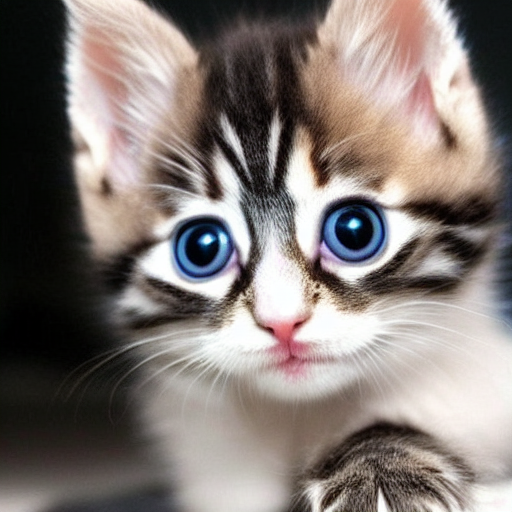

In [41]:


from text3d2video.utilities.ipython_utils import display_ims

gen = torch.Generator(device=device)
gen.manual_seed(0)

images = pipe(["Cute Kitten"], num_inference_steps=50, generator=gen)

images[0]

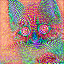

In [40]:
from matplotlib import pyplot as plt
import torchvision.transforms.functional as TF

from text3d2video.feature_visualization import reduce_feature_map

image = images[0]

image_pt = TF.to_tensor(image).to(dtype=pipe.dtype, device=device)

with torch.no_grad():
    encoded = pipe.vae.encode(image_pt.unsqueeze(0).to(device)).latent_dist.sample()[0].cpu()

reduce_feature_map(encoded)

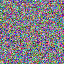

In [45]:
noise = torch.randn(3, 64, 64)

reduce_feature_map(noise)